# Financial Inclusion in East Africa

This analysis is based on 

In [34]:
# importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("data/Financial Dataset.csv")
data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
data.shape

(23524, 13)

In [3]:
# Checking the column names
data.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [4]:
# Checking the overall information of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


The dataframe contains 13 columns with 23524 entries. 3 columns are of numeric type while the rest are of object type. Below we check missing values in individual columns.

In [5]:
def completeness(df):
    """This column checks the percentage completeness of the different columns and
    returns the percentages as a dataframe"""
    # obtaining the columns & length of dataframe
    columns = list(df.columns)
    length_df = len(df)
    perc_completeness = []
    
    for column in columns:
        # finding missing values
        missing =  df[column].isna().sum()
        # percent missing
        perc_miss = (1 - (missing / length_df)) * 100
        perc_completeness.append(perc_miss)
    
    output = pd.DataFrame(list(zip(columns, perc_completeness)),
                          columns= ['Feature', '%_completeness'])
    # sort
    output = output.sort_values(by= '%_completeness', ascending= True)
    output.reset_index(inplace= True, drop= True)
    
    return output
    

In [6]:
completeness(data)

,Feature,%_completeness
0,Has a Bank account,99.846965
1,Respondent Age,99.855467
2,gender_of_respondent,99.855467
3,marital_status,99.863969
4,Type of Job,99.872471
5,Level of Educuation,99.876722
6,household_size,99.880973
7,Type of Location,99.936235
8,country,99.940486
9,Cell Phone Access,99.953239


Most of the data in the dataframe is intanct. Different features will be checked to see if some of the missing values can be salvaged in the EDA phase. Checking the overall descriptive statistics of the numeric columns below:

In [5]:
# Checking the overall statistical description of the data set
data.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


## EDA

#### 1. Has a bank account

In [7]:
data['Has a Bank account'].nunique()

2

In [8]:
data['Has a Bank account'].value_counts()

No     20179
Yes     3309
Name: Has a Bank account, dtype: int64

This is a categorical column and also the target column. I will drop null values based on this column.

In [9]:
data['Has a Bank account'].isna().sum()

36

In [10]:
data.dropna(subset= 'Has a Bank account', inplace= True)

#### 2. Gender of respondent

In [21]:
data['gender_of_respondent'].isna().sum()

34

In [13]:
data['gender_of_respondent'].nunique()

2

These is a categorical column.

In [25]:
data['gender_of_respondent'].value_counts()

'Female'

In [22]:
data['gender_of_respondent'].fillna('Unknown', inplace= True)

In [30]:
def perc_dist(df, column):
    entries = len(df)
    val_list = list(df[column].unique())
    perc = []
    for val in val_list:
        observations = len(df[df[column] == val])
        ration = round((observations / entries) * 100, 2)
        perc.append(ration)
    # inserted the dataframe
    output = pd.DataFrame(list(zip(val_list, perc)), columns= ['features', 'percentage'])
    # sort
    output = output.sort_values(by= 'percentage', ascending= False)
    output.reset_index(inplace= True, drop= True)
    return output

In [31]:
# gender percentage of respondents
perc_dist(data, 'gender_of_respondent')

,features,percentage
0,Female,58.92
1,Male,40.94
2,Unknown,0.14


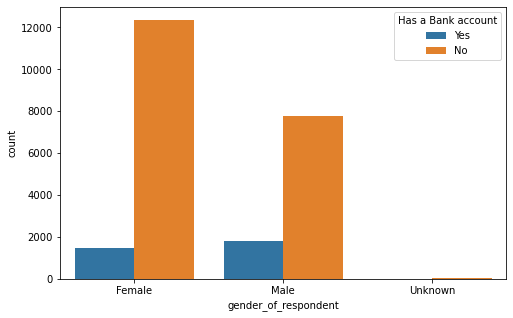

In [37]:
fig, ax = plt.subplots(figsize= (8, 5))
sns.countplot(data= data, x= 'gender_of_respondent', hue= 'Has a Bank account');

There is a significantly high number of women who have no bank accounts compared to men. The number of men and women with access to bank accounts is about the same, with men slighly being higher than women.
##### questions?
1. What percentage of men have access to bank accounts?
2. What percentage of women have access to bank accounts?
3. What is the reason for this observations/ratios?

#### 3. Marital status

In [38]:
data['marital_status'].nunique()

5

In [39]:
data['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know', nan], dtype=object)

In [47]:
data.loc[data['marital_status'] == 'Dont know', 'marital_status'] = 'Single/Never Married'
data['marital_status'].fillna('Single/Never Married', inplace= True)

In [48]:
perc_dist(data, 'marital_status')

,features,percentage
0,Married/Living together,45.70
1,Single/Never Married,34.00
2,Widowed,11.49
3,Divorced/Seperated,8.80


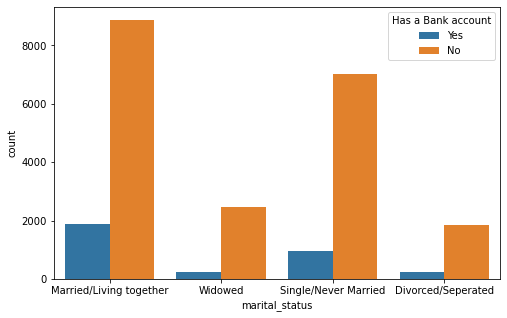

In [49]:
fig, ax = plt.subplots(figsize= (8, 5))
sns.countplot(data= data, x= 'marital_status', hue= 'Has a Bank account');

The number of Married/Living together individuals without access to bank accounts is the highest, seconded by Single/Never Married, with Widowed and Divorced/Separated individuals being being just about the same. Overall the number of people with access to bank accounts seem to be very low.
##### questions?
1. Why do we observe such low number of people with access to banks?
2. Why the high number of lack of access to banks in the Married/Living together? Can this be alleviated?
3. What is the relationship between access to bank account and marital status?

#### 4. Respondent age

In [51]:
data['Respondent Age'].isna().sum()

31

In [68]:
data['Respondent Age'].describe()

count    23457.000000
mean        38.809993
std         16.524923
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent Age, dtype: float64

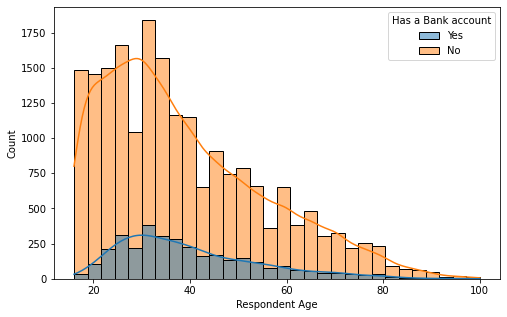

In [64]:
fig, ax = plt.subplots(figsize= (8, 5))
sns.histplot(data= data, x= 'Respondent Age', hue= 'Has a Bank account', bins= 30, kde= True);

The distribution of the people is skewed towards the right. Missing values will be replaced with the median value. But first, checking for outliers is the step we take below:

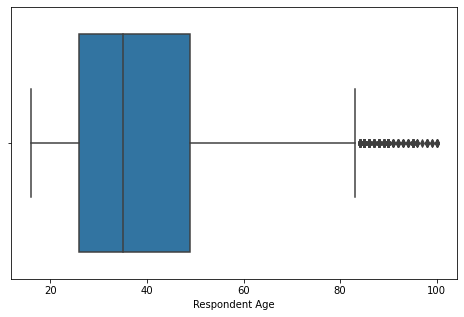

In [66]:
fig, ax = plt.subplots(figsize= (8, 5))
sns.boxplot(data= data, x= 'Respondent Age');

From the boxplot above, it appears that the age above 85 years could be outliers. Columns with values above 85 are dropped in below:

In [72]:
# filling missing values with median
data['Respondent Age'].fillna(data['Respondent Age'].median(), inplace= True)

In [78]:
# checking number of values above 85
exp = data[data['Respondent Age'] > 85].copy()
len(exp)

166

In [79]:
data = data[data['Respondent Age'] <= 85].copy()

#### 5. Type of Job

In [83]:
data['Type of Job'].isna().sum()

30

In [81]:
data['Type of Job'].nunique()

10

In [82]:
data['Type of Job'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', nan, 'No Income'], dtype=object)

In [84]:
data['Type of Job'].fillna('Dont Know/Refuse to answer', inplace= True)

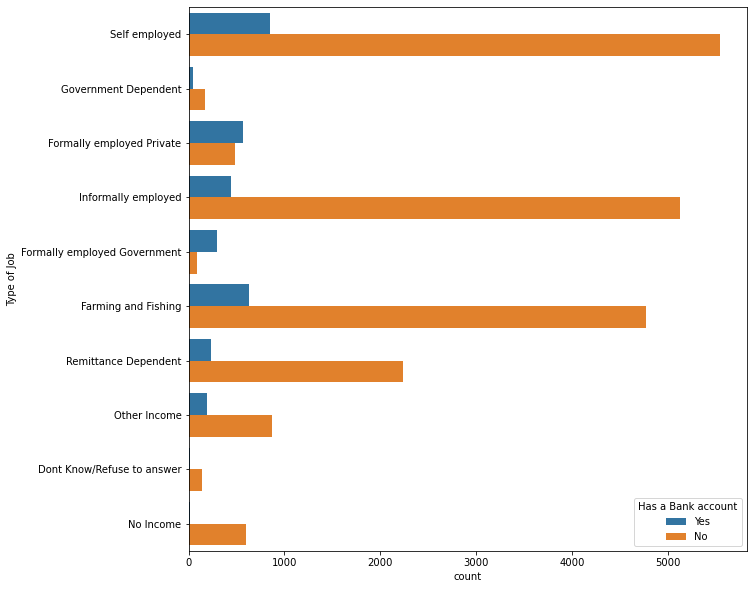

In [91]:
fig, ax = plt.subplots(figsize= (10, 10))
sns.countplot(data= data, y= 'Type of Job', hue= 'Has a Bank account');

In [12]:
completeness(data)

,Feature,%_completeness
0,gender_of_respondent,99.855245
1,marital_status,99.863760
2,Respondent Age,99.868018
3,Type of Job,99.872275
4,Level of Educuation,99.876533
5,household_size,99.880790
6,country,99.940395
7,Type of Location,99.970198
8,The relathip with head,99.982970
9,Cell Phone Access,99.987228
